Notebook for Optim application. Notebook for supplementary material of a submitted publication. 

### Imports and settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json


%matplotlib widget
import time
import numpy as np
from aeromaps import create_process
from aeromaps.core.models import (
    models_optim_simple,
)

import gemseo as gm
gm.configure_logger()

<RootLogger root (INFO)>

In [2]:
# # Define the quantity range
# quantity = np.linspace(1, 16, 1000)  # Define quantity range

# # Constant elasticity demand function: P = a * Q^(-1/b)
# a = 17
# b = 0.4
# price = (a / quantity) ** (1 / b)

# # Market prices
# market_price = 2
# market_price_1 = 4

# # Plotting the demand curve
# plt.figure(figsize=(10, 6))
# plt.plot(quantity, price, label="Demand Curve", color="#031926")

# # Highlighting the consumer surplus area for the first market price
# plt.fill_between(
#     quantity,
#     market_price,
#     price,
#     where=(price >= market_price),
#     interpolate=True,
#     color="#9DBEBB",
#     alpha=0.5,
#     label="Initial Surplus",
# )

# # Highlighting the additional consumer surplus area for the second market price
# plt.fill_between(
#     quantity,
#     market_price,
#     price,
#     where=((price >= market_price) & (price <= market_price_1)),
#     interpolate=False,
#     facecolor="none",
#     edgecolor="#41625F",
#     alpha=1,
#     hatch="/",
#     linewidth=0,
# )

# # Highlighting the additional consumer surplus area for the second market price
# plt.fill_between(
#     quantity,
#     market_price,
#     market_price_1,
#     where=((price >= market_price_1 - 0.01)),
#     interpolate=False,
#     facecolor="none",
#     edgecolor="#41625F",
#     alpha=1,
#     linewidth=0,
#     hatch="/",
# )

# # Adding the equilibrium price lines

# plt.fill_between(
#     quantity,
#     market_price - 0.8,
#     market_price,
#     where=((price >= market_price)),
#     interpolate=False,
#     color="#D38F22",
#     alpha=0.5,
#     label="Initial Profit",
# )

# plt.fill_between(
#     quantity,
#     market_price - 0.8,
#     market_price,
#     where=((price <= market_price_1) & (price >= market_price)),
#     interpolate=False,
#     color="none",
#     edgecolor="#9E6B1A",
#     alpha=1,
#     linewidth=1,
#     hatch="\\",
# )


# plt.fill_between(
#     quantity,
#     market_price_1,
#     market_price_1_notax,
#     where=((price >= market_price_1)),
#     interpolate=False,
#     color="none",
#     edgecolor="#A86185",
#     alpha=1,
#     linewidth=1,
#     hatch=".",
# )


# plt.axhline(
#     y=market_price - 0.8, color="#D38F22", linestyle="--", linewidth=2, label="Initial Average Cost"
# )
# plt.axhline(y=market_price, color="#D38F22", linestyle=":", linewidth=2, label="Initial Price")

# plt.axhline(y=market_price_1, color="#D90F08", linestyle=":", linewidth=2, label="New Price")

# market_price_1_notax = market_price + 0.6 * (-market_price + market_price_1)

# plt.axhline(
#     y=market_price_1_notax,
#     color="#D90F08",
#     linestyle="-.",
#     linewidth=2,
#     label="New price without tax",
# )


# # Adding P1 and P2 at the intersection of the demand curve with market prices
# P1 = quantity[np.abs(price - market_price).argmin()]
# P2 = quantity[np.abs(price - market_price_1).argmin()]
# plt.scatter([P1, P2], [market_price, market_price_1], color="black")
# plt.text(
#     P1 + 0.2,
#     market_price + 0.2,
#     " E1",
#     verticalalignment="bottom",
#     horizontalalignment="right",
#     color="black",
#     fontsize=14,
# )
# plt.text(
#     P2 + 0.2,
#     market_price_1 + 0.2,
#     " E2",
#     verticalalignment="bottom",
#     horizontalalignment="right",
#     color="black",
#     fontsize=14,
# )

# # Adding text in the lost surplus zone
# plt.text(
#     10,
#     (market_price + market_price_1) / 2.3,
#     "Lost Surplus",
#     verticalalignment="center",
#     horizontalalignment="center",
#     color="black",
#     fontsize=14,
#     bbox=dict(facecolor="#C2D6D4", alpha=1, boxstyle="round"),
# )

# plt.text(
#     11.2,
#     (market_price - 0.42),
#     "Lost Profit",
#     verticalalignment="center",
#     horizontalalignment="center",
#     color="black",
#     fontsize=14,
#     bbox=dict(facecolor="#EBC484", alpha=1, boxstyle="round"),
# )

# plt.text(
#     8,
#     (market_price_1_notax + 0.4),
#     "Extra tax raised",
#     verticalalignment="center",
#     horizontalalignment="center",
#     color="black",
#     fontsize=14,
#     bbox=dict(facecolor="#B77B99", alpha=1, boxstyle="round"),
# )


# # Adding arrows and text between each hline

# # Arrow and text between Initial Price and Initial Average Cost
# plt.annotate(
#     "",
#     xy=(13.2, market_price_1_notax),
#     xytext=(13.2, market_price_1),
#     arrowprops=dict(arrowstyle="<->", color="black"),
# )
# plt.text(
#     13.4,
#     (market_price_1_notax + market_price_1) / 2,
#     "Price increase: extra tax",
#     verticalalignment="center",
#     horizontalalignment="left",
#     color="black",
#     fontsize=12,
# )

# # Arrow and text between Initial Price and New Price
# plt.annotate(
#     "",
#     xy=(13.2, market_price),
#     xytext=(13.2, market_price_1_notax),
#     arrowprops=dict(arrowstyle="<->", color="black"),
# )
# plt.text(
#     13.4,
#     (market_price + market_price_1) / 2.2,
#     "Price increase: change in cost",
#     verticalalignment="center",
#     horizontalalignment="left",
#     color="black",
#     fontsize=12,
# )


# # Labels and title
# plt.xlabel("Demand", fontsize=14)

# plt.ylabel("Price", fontsize=14)

# # Customizing ticks
# plt.xticks([])
# plt.yticks([0])
# plt.xlim(7, 16)
# plt.ylim(0, 7)

# plt.legend(fontsize=14, ncol=2)
# plt.tight_layout()
# plt.savefig("CS_simple.pdf")

# 1- Scenario initialisation and settings

The first phase corresponds to running a first, central scenario with AeroMAPS. Other runs ar performed afterwards.

In [3]:
from aeromaps.utils.functions import create_partitioning

In [4]:
# create_partitioning(file="data_optim/aeroscope_europe_data.csv", path="data_optim")

## 2. Run AeroMAPS on this studied scope

In [5]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import default_models_top_down

In [6]:
models = {
    "models_optim_simple": models_optim_simple,
}

Create process as usual, the partitionning is recuperated as specified in the config file.

In [7]:
process = create_process(
    # configuration_file="data_optim/config.json",
    models=models,
    use_fleet_model=False
)

## 1-a) Air traffic evolution

As of April 2024, AeroMAPS is considering an exgenous growth rate.
For the purposes of this article, an uniform growth rate of 3% is set. This is significantly lower from industry prospects such as [Airbus GMF: 3.6%](https://www.airbus.com/en/products-services/commercial-aircraft/market/global-market-forecast) or [Boeing CMO: 3.8%](https://www.boeing.com/content/dam/boeing/boeingdotcom/market/assets/downloads/CMO_2022_Report_FINAL_v02.pdf), but higher than [IEA Net Zero: 2.1% (2019 as base year)](https://www.iea.org/reports/net-zero-roadmap-a-global-pathway-to-keep-the-15-0c-goal-in-reach).


In [8]:
## Growth rate by category [%]
# process.parameters.cagr_passenger_short_range_reference_periods = []
# process.parameters.cagr_passenger_short_range_reference_periods_values = [-1.0]
# process.parameters.cagr_passenger_medium_range_reference_periods = []
# process.parameters.cagr_passenger_medium_range_reference_periods_values = [1.0]
# process.parameters.cagr_passenger_long_range_reference_periods = []
# process.parameters.cagr_passenger_long_range_reference_periods_values = [1.0]
# process.parameters.cagr_freight_reference_periods = []
# process.parameters.cagr_freight_reference_periods_values = [1.0]

## 1-b) Aircraft fleet

Top-down fleet, without hydrogen aircraft, callibrated on the fleet of the MACC applciation, with drop-in instead of h2  
http://localhost:8888/lab/tree/aeromaps/notebooks/data_cost/top_down_cost_callibration_phd.ipynb

Mean annual efficiency improvement: 1.4% --> applied to all catgeories

In [9]:
# process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
# process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.4]
# process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
# process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.4]
# process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
# process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.4]

## Hydrogen aircraft
# NONE

### 1-c) Operational improvements

Operational improvements are considered via two opportunities. 
- Load factor improvement: improvement to 89% at the end of the scenario.
- Operational efficiency (better ATM, aircrfat MRO and operational optimisation): improvement of 8% in 25y. 

Cost savings incur through the fuel savings. However, it could come at an extra cost (non-energy). This parameter is modelled, but not considered in this article due to lack of specific informations to the best of our knowldege.


In [10]:
# process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [11]:
# # Aircraft fleet and operation evolution - Operations

# ## Values for setting the logistic function
# process.parameters.operations_final_gain = 8.0  # [%]
# process.parameters.operations_start_year = 2025
# process.parameters.operations_duration = 25.0

## 1-d) Energy

Top-down callibrated on the values of teh MACC apllication.
Faster optim but caution as MFSP full computation is more detailled: larges use of e-fuel in the begining influence late mFSp (no-decomissioning)

In [12]:
# # Energy settings: production choices

# # Aircraft energy - Introduction of alternative drop-in fuels

# ## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
process.parameters.biofuel_share_reference_years_values = [0, 2, 4.8, 15, 24, 27, 35]
process.parameters.electrofuel_share_reference_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
process.parameters.electrofuel_share_reference_years_values = [0, 0, 1.2, 5, 10, 15, 35]


# ## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
# process.parameters.biofuel_hefa_fog_share_reference_years = []
# process.parameters.biofuel_hefa_fog_share_reference_years_values = [0.6]
# process.parameters.biofuel_hefa_others_share_reference_years = []
# process.parameters.biofuel_hefa_others_share_reference_years_values = [12.5]
# process.parameters.biofuel_ft_others_share_reference_years = []
# process.parameters.biofuel_ft_others_share_reference_years_values = [68.9]
# process.parameters.biofuel_ft_msw_share_reference_years = []
# process.parameters.biofuel_ft_msw_share_reference_years_values = [6.6]


In [13]:
# process.parameters.biofuel_hefa_fog_mfsp_simple_reference_years = []
# process.parameters.biofuel_hefa_fog_mfsp_simple_reference_years_values = [0.815488]
# process.parameters.biofuel_hefa_others_mfsp_simple_reference_years = []
# process.parameters.biofuel_hefa_others_mfsp_simple_reference_years_values = [1.052703]
# process.parameters.biofuel_ft_others_mfsp_simple_reference_years = []
# process.parameters.biofuel_ft_others_mfsp_simple_reference_years_values = [1.378082]
# process.parameters.biofuel_ft_msw_mfsp_simple_reference_years = []
# process.parameters.biofuel_ft_msw_mfsp_simple_reference_years_values = [1.142423]
# process.parameters.biofuel_atj_mfsp_simple_reference_years = []
# process.parameters.biofuel_atj_mfsp_simple_reference_years_values = [1.38668]

# process.parameters.electrofuel_mfsp_simple_reference_years = [
#     2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
#     2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
#     2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050
# ]
# process.parameters.electrofuel_mfsp_simple_reference_years_values = [
#     3.720546, 3.720546, 3.720546, 3.720546, 3.720546, 3.720546, 3.720546,
#     3.573659, 3.426978, 3.277308, 3.130003, 3.095717, 3.062247, 3.029682,
#     2.998903, 2.971869, 2.946851, 2.923276, 2.901135, 2.882374, 2.866464,
#     2.852876, 2.841350, 2.829845, 2.807006, 2.774737, 2.737160, 2.698305,
#     2.660365, 2.624329, 2.590476
# ]


process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [0, 0, 0, 0]

process.parameters.aviation_carbon_budget_objective = 3.

## 1-e) Other process.parameters 

Downscaling not automatic

In [14]:
# # Environmental limits

# ## Carbon budgets and Carbon Dioxide Removal [GtCO2]
# process.parameters.net_carbon_budget = 850.0
# process.parameters.carbon_dioxyde_removal_2100 = 285.0

In [15]:
# # Allocation settings

# ## Aviation share of the global (equivalent) carbon budget [%]
# process.parameters.aviation_carbon_budget_allocated_share = 2.6
# process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

# ## Aviation share of the global energy resources (biomass and electricity) [%]
# process.parameters.aviation_biomass_allocated_share = 5.0
# process.parameters.aviation_electricity_allocated_share = 5.0

## 2 - Problem definition

In [23]:
from gemseo.algos.design_space import DesignSpace
from gemseo import generate_n2_plot, create_scenario


design_space = DesignSpace()

# design_space.add_variable("load_factor_end_year", size=1, lower_bound=89.0, upper_bound=89.5, value=89.2)
design_space.add_variable("electrofuel_share_reference_years_values", size=7, lower_bound=[0, 0, 0, 0, 0, 0, 0], upper_bound=[0, 100, 100,100, 100, 100, 100], value=[0, 50, 50, 50, 50, 50, 50])
design_space.add_variable("biofuel_share_reference_years_values", size=7, lower_bound=np.array([0, 0, 0,0, 0, 0, 0]), upper_bound=np.array([0, 100, 100,100, 100, 100, 100]), value=np.array([0, 0, 1.2, 5, 10, 15, 35]))
# design_space.add_variable("biofuel_share_reference_years_values", size=1, lower_bound=1, upper_bound=100, value=5)

objective_name = "cumulative_total_airline_cost_discounted_obj"


process.gemseo_settings["design_space"] = design_space

process.gemseo_settings["objective_name"] = objective_name

# Create a GEMSEO scenario
process.create_gemseo_scenario()

# Set differention method (only use for gradient based optimizers)
process.scenario.set_differentiation_method("finite_differences")

# Add constraints
process.scenario.add_constraint('aviation_carbon_budget_constraint', 'ineq')
process.scenario.add_constraint('blend_completeness_constraint', 'ineq')
process.scenario.add_constraint('electricity_trajectory_constraint', 'ineq')
process.scenario.add_constraint('biomass_trajectory_constraint', 'ineq')
process.scenario.add_constraint('electrofuel_use_growth_constraint', 'ineq')
process.scenario.add_constraint('biofuel_use_growth_constraint', 'ineq')


process.scenario.formulation.optimization_problem.objective = process.scenario.formulation.optimization_problem.objective * 1e-12


# Configure the algorithm used
# config_algo = {"algo": "NLOPT_COBYLA", "max_iter": 200}
config_algo = {"algo": "SLSQP", "max_iter": 1000}
# config_algo = {"algo": "DIFFERENTIAL_EVOLUTION", "max_iter": 1000}

process.input_data.update(config_algo)

 WARNING - 15:07:55: No coupling in MDA, switching chain_linearize to True.


# 2- Compute

Run AeroMAPS process

In [ ]:
process.compute()

    INFO - 15:07:57:  
    INFO - 15:07:57: *** Start MDOScenario execution ***
    INFO - 15:07:57: MDOScenario
    INFO - 15:07:57:    Disciplines: MDAChain
    INFO - 15:07:57:    MDO formulation: MDF
    INFO - 15:07:57: Optimization problem:
    INFO - 15:07:57:    minimize 1e-12*cumulative_total_airline_cost_discounted_obj(electrofuel_share_reference_years_values, biofuel_share_reference_years_values)
    INFO - 15:07:57:    with respect to biofuel_share_reference_years_values, electrofuel_share_reference_years_values
    INFO - 15:07:57:    subject to constraints:
    INFO - 15:07:57:       aviation_carbon_budget_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_values) <= 0
    INFO - 15:07:57:       blend_completeness_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_values) <= 0
    INFO - 15:07:57:       electricity_trajectory_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_v

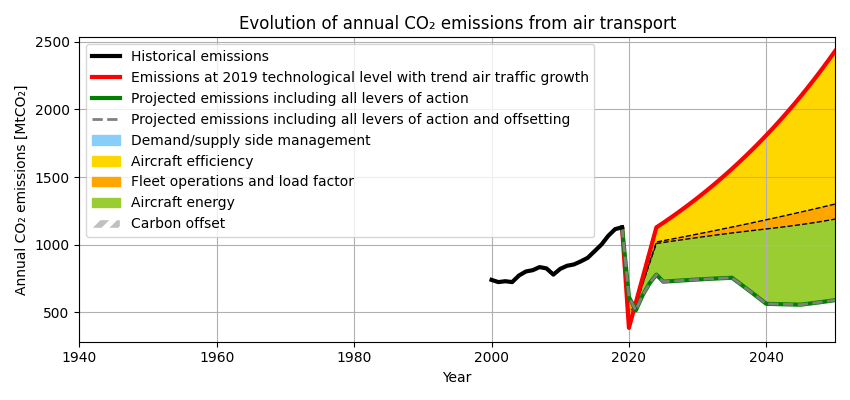

In [18]:
process.plot("air_transport_co2_emissions")

### Cas 1 

min cumulative_total_airline_cost_discounted

w.r.t. biofuel_share_reference_years_values, electrofuel_share_reference_years_values, 

s.t. cumulative_co2_emissions, electricity_consumption, biomass_consumption, max(biofuel_share_prospective + electrofuel_share_prospective)



In [19]:
models = {
    "models_optim_simple": models_optim_simple,
    
}

### Cas 2

In [20]:
models = {
    "models_optim_compex": models_optim_complex,
}

NameError: name 'models_optim_complex' is not defined

# 3- Analyses

## 3-a) Base Scenario sustainability 

Lets begin by exploring the sustainability of the scenario:
- $CO_2$ emissions trajectory
- Fuels emission factors
- Ressources consumption

In [ ]:
plt.rc("hatch", linewidth=1)

## 3-b) Costs

Then two cost parameters are presented here:
- Energy Cost 
- Aircraft DOC

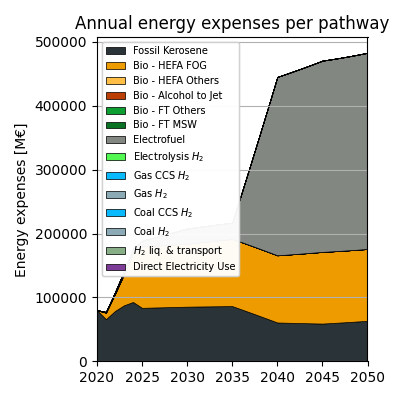

In [22]:
process.plot("energy_expenses_without_carbon_tax")

In [ ]:
process.vector_outputs_df["electricity_emission_factor"]

In [ ]:
process.data["float_outputs"]["aviation_carbon_budget_constraint"]

In [ ]:
process.vector_outputs_df["biofuel"]